# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import plotly.express as px


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Read and clean data

We imported data on the population of the world between 1950 and 2021. Then, we decided to only keep data on the continents and the world itself. 
The table is    

In [63]:
pop = pd.read_csv('population-and-demography.csv')

continents = ['Africa (UN)', 'Europe (UN)', 'Asia (UN)', 'World', 'Northern America (UN)', 'Latin America and the Caribbean (UN)', 'Oceania (UN)']

filtered_pop = pop[pop['Country name'].isin(continents)]


filtered_pop.head(504)

drop_these = ['Population at age 1','Population of children under the age of 5', 'Population of children under the age of 15', 'Population under the age of 25', 'Population aged 15 to 64 years', 'Population older than 15 years', 'Population older than 18 years', 'population__all__20_24__records', 'population__all__25_29__records', 'population__all__30_34__records', 'population__all__35_39__records', 'population__all__40_44__records', 'population__all__45_49__records', 'population__all__50_54__records', 'population__all__55_59__records', 'population__all__60_64__records', 'population__all__65_69__records', 'population__all__70_74__records', 'population__all__75_79__records', 'population__all__80_84__records', 'population__all__85_89__records', 'population__all__90_94__records', 'population__all__95_99__records' ]

filtered_pop = filtered_pop.drop(drop_these, axis = 1)

new_index = range(1,505)

filtered_pop.index = new_index

filtered_pop.head(504)

filtered_pop.rename(columns = {'Country name' : 'Continents and World'}, inplace = True)
filtered_pop.head(504)

,Continents and World,Year,Population,Population of children under the age of 1,Population aged 1 to 4 years,Population aged 5 to 9 years,Population aged 10 to 14 years,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
1,Africa (UN),1950,227549260,9393661.0,29672912.0,29653958,25792740,23087212,37677212,27422540,19586988,13178286,7893063,3445317,700903,43862,615.0
2,Africa (UN),1951,232484000,9684508.0,30318004.0,30523140,26205760,23471334,38505124,28050804,19993920,13463632,8015908,3499692,709683,41884,602.0
3,Africa (UN),1952,237586060,9921448.0,31046300.0,31460048,26651612,23855340,39329870,28694808,20406358,13754924,8147429,3558314,718430,40599,582.0
4,Africa (UN),1953,242837440,10167668.0,31877272.0,32368278,27171188,24225864,40120050,29340532,20827816,14056554,8291982,3621039,728561,40087,557.0
5,Africa (UN),1954,248244770,10409928.0,32848608.0,33192114,27802460,24585024,40875776,29989164,21257012,14365597,8451841,3685246,741198,40304,499.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,World,2017,7599822300,139420590.0,550940160.0,668653200,631596500,607785800,1207877900,1092995100,953971900,772621950,549785660,285532670,119566930,18615136,459150.0
501,World,2018,7683790000,137690030.0,550970400.0,674324740,638451460,611398340,1204281300,1114043900,958684500,788847800,566538940,295304100,123199544,19578904,475921.0
502,World,2019,7764951000,135471330.0,549401300.0,678417150,645915800,615536000,1200389900,1133424100,963090600,809066200,579960400,306498750,126700504,20575482,503572.0
503,World,2020,7840953000,133345180.0,545801000.0,681410500,653182000,619493500,1196254600,1151358000,969082800,830432400,590299300,318539100,129707720,21499228,547543.0


## Plots

## **1**

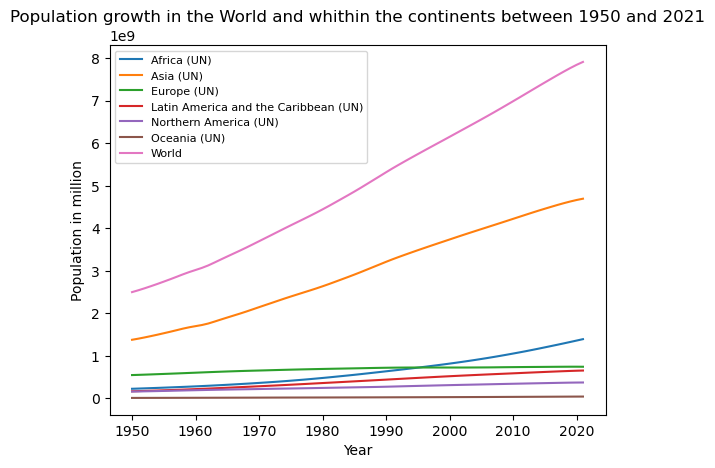

In [70]:

# Selecting only the desired columns
selected_columns = filtered_pop[['Continents and World', 'Year', 'Population']]

# Plotting the data
for continent, data in selected_columns.groupby('Continents and World'):
    plt.plot(data['Year'], data['Population'], label=continent)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population in million')
plt.title('Population growth in the World and whithin the continents between 1950 and 2021')

# Adding legend
plt.legend(fontsize = '8')

# Displaying the plot
plt.show()

## **2**

## 2.1: Population of children under the age of 1

In [97]:
# Filter the DataFrame to select data related to Africa
africa_data = filtered_pop[filtered_pop['Continents and World'] == 'Africa (UN)']

# Filter the DataFrame to select data related to other continents
other_continents_data = filtered_pop[~filtered_pop['Continents and World'].isin(['Africa (UN)', 'World'])]

# Columns to include in the plot
columns_to_plot = ['Population of children under the age of 1']

# Concatenate Africa data with data from other continents
combined_data = pd.concat([africa_data, other_continents_data])

# Create an interactive line plot with multiple curves using Plotly Express
fig = px.line(combined_data, x='Year', y='Population of children under the age of 1', color='Continents and World', 
              title='Population of children under the age of 1 in every continents between 1950 and 2021', 
              labels={'value': 'Population', 'Year': 'Year', 'Continents and World': 'Continent'})

# Show the interactive line plot
fig.show()


## 2.2: Population between 1 and 4

In [99]:
# Filter the DataFrame to select data related to Africa
africa_data = filtered_pop[filtered_pop['Continents and World'] == 'Africa (UN)']

# Filter the DataFrame to select data related to other continents
other_continents_data = filtered_pop[~filtered_pop['Continents and World'].isin(['Africa (UN)', 'World'])]

# Columns to include in the plot
columns_to_plot = ['Population aged 1 to 4 years']

# Concatenate Africa data with data from other continents
combined_data = pd.concat([africa_data, other_continents_data])

# Create an interactive line plot with multiple curves using Plotly Express
fig = px.line(combined_data, x='Year', y='Population aged 1 to 4 years', color='Continents and World', 
              title='Population aged 1 to 4 in every continents between 1950 and 2021', 
              labels={'value': 'Population', 'Year': 'Year', 'Continents and World': 'Continent'})

# Show the interactive line plot
fig.show()


## 2.3: Population aged 5 and 9 years 

In [108]:
# Filter the DataFrame to select data related to Africa
africa_data = filtered_pop[filtered_pop['Continents and World'] == 'Africa (UN)']

# Filter the DataFrame to select data related to other continents
other_continents_data = filtered_pop[~filtered_pop['Continents and World'].isin(['Africa (UN)', 'World'])]

# Columns to include in the plot
columns_to_plot = ['Population aged 5 to 9 years']

# Concatenate Africa data with data from other continents
combined_data = pd.concat([africa_data, other_continents_data])

# Create an interactive line plot with multiple curves using Plotly Express
fig = px.line(combined_data, x='Year', y='Population aged 5 to 9 years', color='Continents and World', 
              title='Population aged 5 to 9 in every continents between 1950 and 2021', 
              labels={'value': 'Population', 'Year': 'Year', 'Continents and World': 'Continent'})

# Show the interactive line plot
fig.show()

## 2.4: Population aged 10 to 14 years

In [104]:
# Filter the DataFrame to select data related to Africa
africa_data = filtered_pop[filtered_pop['Continents and World'] == 'Africa (UN)']

# Filter the DataFrame to select data related to other continents
other_continents_data = filtered_pop[~filtered_pop['Continents and World'].isin(['Africa (UN)', 'World'])]

# Columns to include in the plot
columns_to_plot = ['Population aged 10 to 14 years']

# Concatenate Africa data with data from other continents
combined_data = pd.concat([africa_data, other_continents_data])

# Create an interactive line plot with multiple curves using Plotly Express
fig = px.line(combined_data, x='Year', y='Population aged 10 to 14 years', color='Continents and World', 
              title='Population aged 10 to 14 in every continents between 1950 and 2021', 
              labels={'value': 'Population', 'Year': 'Year', 'Continents and World': 'Continent'})

# Show the interactive line plot
fig.show()

## 2.5: Population aged 15 to 19 years

In [105]:
# Filter the DataFrame to select data related to Africa
africa_data = filtered_pop[filtered_pop['Continents and World'] == 'Africa (UN)']

# Filter the DataFrame to select data related to other continents
other_continents_data = filtered_pop[~filtered_pop['Continents and World'].isin(['Africa (UN)', 'World'])]

# Columns to include in the plot
columns_to_plot = ['Population aged 15 to 19 years']

# Concatenate Africa data with data from other continents
combined_data = pd.concat([africa_data, other_continents_data])

# Create an interactive line plot with multiple curves using Plotly Express
fig = px.line(combined_data, x='Year', y='Population aged 15 to 19 years', color='Continents and World', 
              title='Population aged 15 to 19 in every continents between 1950 and 2021', 
              labels={'value': 'Population', 'Year': 'Year', 'Continents and World': 'Continent'})

# Show the interactive line plot
fig.show()

## 2.6: Population aged 20 to 29 years

In [106]:
# Filter the DataFrame to select data related to Africa
africa_data = filtered_pop[filtered_pop['Continents and World'] == 'Africa (UN)']

# Filter the DataFrame to select data related to other continents
other_continents_data = filtered_pop[~filtered_pop['Continents and World'].isin(['Africa (UN)', 'World'])]

# Columns to include in the plot
columns_to_plot = ['Population aged 20 to 29 years']

# Concatenate Africa data with data from other continents
combined_data = pd.concat([africa_data, other_continents_data])

# Create an interactive line plot with multiple curves using Plotly Express
fig = px.line(combined_data, x='Year', y='Population aged 20 to 29 years', color='Continents and World', 
              title='Population aged 20 to 29 in every continents between 1950 and 2021', 
              labels={'value': 'Population', 'Year': 'Year', 'Continents and World': 'Continent'})

# Show the interactive line plot
fig.show()

## 2.7: Population aged 30 to 39 years 

In [107]:
# Filter the DataFrame to select data related to Africa
africa_data = filtered_pop[filtered_pop['Continents and World'] == 'Africa (UN)']

# Filter the DataFrame to select data related to other continents
other_continents_data = filtered_pop[~filtered_pop['Continents and World'].isin(['Africa (UN)', 'World'])]

# Columns to include in the plot
columns_to_plot = ['Population aged 30 to 39 years']

# Concatenate Africa data with data from other continents
combined_data = pd.concat([africa_data, other_continents_data])

# Create an interactive line plot with multiple curves using Plotly Express
fig = px.line(combined_data, x='Year', y='Population aged 30 to 39 years', color='Continents and World', 
              title='Population aged 30 to 39 in every continents between 1950 and 2021', 
              labels={'value': 'Population', 'Year': 'Year', 'Continents and World': 'Continent'})

# Show the interactive line plot
fig.show()

## 2.8: Population aged 40 to 49 years

In [109]:
# Filter the DataFrame to select data related to Africa
africa_data = filtered_pop[filtered_pop['Continents and World'] == 'Africa (UN)']

# Filter the DataFrame to select data related to other continents
other_continents_data = filtered_pop[~filtered_pop['Continents and World'].isin(['Africa (UN)', 'World'])]

# Columns to include in the plot
columns_to_plot = ['Population aged 40 to 49 years']

# Concatenate Africa data with data from other continents
combined_data = pd.concat([africa_data, other_continents_data])

# Create an interactive line plot with multiple curves using Plotly Express
fig = px.line(combined_data, x='Year', y='Population aged 40 to 49 years', color='Continents and World', 
              title='Population aged 40 to 49 in every continents between 1950 and 2021', 
              labels={'value': 'Population', 'Year': 'Year', 'Continents and World': 'Continent'})

# Show the interactive line plot
fig.show()

## 2.9: Population aged 50 to 59 years

In [110]:
# Filter the DataFrame to select data related to Africa
africa_data = filtered_pop[filtered_pop['Continents and World'] == 'Africa (UN)']

# Filter the DataFrame to select data related to other continents
other_continents_data = filtered_pop[~filtered_pop['Continents and World'].isin(['Africa (UN)', 'World'])]

# Columns to include in the plot
columns_to_plot = ['Population aged 50 to 59 years']

# Concatenate Africa data with data from other continents
combined_data = pd.concat([africa_data, other_continents_data])

# Create an interactive line plot with multiple curves using Plotly Express
fig = px.line(combined_data, x='Year', y='Population aged 50 to 59 years', color='Continents and World', 
              title='Population aged 50 to 59 in every continents between 1950 and 2021', 
              labels={'value': 'Population', 'Year': 'Year', 'Continents and World': 'Continent'})

# Show the interactive line plot
fig.show()

## 2.10: Population aged 60 to 69 years

In [111]:
# Filter the DataFrame to select data related to Africa
africa_data = filtered_pop[filtered_pop['Continents and World'] == 'Africa (UN)']

# Filter the DataFrame to select data related to other continents
other_continents_data = filtered_pop[~filtered_pop['Continents and World'].isin(['Africa (UN)', 'World'])]

# Columns to include in the plot
columns_to_plot = ['Population aged 60 to 69 years']

# Concatenate Africa data with data from other continents
combined_data = pd.concat([africa_data, other_continents_data])

# Create an interactive line plot with multiple curves using Plotly Express
fig = px.line(combined_data, x='Year', y='Population aged 60 to 69 years', color='Continents and World', 
              title='Population aged 60 to 69 in every continents between 1950 and 2021', 
              labels={'value': 'Population', 'Year': 'Year', 'Continents and World': 'Continent'})

# Show the interactive line plot
fig.show()

## 2.11: Population aged 70 to 79 years

In [112]:
# Filter the DataFrame to select data related to Africa
africa_data = filtered_pop[filtered_pop['Continents and World'] == 'Africa (UN)']

# Filter the DataFrame to select data related to other continents
other_continents_data = filtered_pop[~filtered_pop['Continents and World'].isin(['Africa (UN)', 'World'])]

# Columns to include in the plot
columns_to_plot = ['Population aged 70 to 79 years']

# Concatenate Africa data with data from other continents
combined_data = pd.concat([africa_data, other_continents_data])

# Create an interactive line plot with multiple curves using Plotly Express
fig = px.line(combined_data, x='Year', y='Population aged 70 to 79 years', color='Continents and World', 
              title='Population aged 70 to 79 in every continents between 1950 and 2021', 
              labels={'value': 'Population', 'Year': 'Year', 'Continents and World': 'Continent'})

# Show the interactive line plot
fig.show()

## 2.12: Population aged 80 to 89 years

In [113]:
# Filter the DataFrame to select data related to Africa
africa_data = filtered_pop[filtered_pop['Continents and World'] == 'Africa (UN)']

# Filter the DataFrame to select data related to other continents
other_continents_data = filtered_pop[~filtered_pop['Continents and World'].isin(['Africa (UN)', 'World'])]

# Columns to include in the plot
columns_to_plot = ['Population aged 80 to 89 years']

# Concatenate Africa data with data from other continents
combined_data = pd.concat([africa_data, other_continents_data])

# Create an interactive line plot with multiple curves using Plotly Express
fig = px.line(combined_data, x='Year', y='Population aged 80 to 89 years', color='Continents and World', 
              title='Population aged 80 to 89 in every continents between 1950 and 2021', 
              labels={'value': 'Population', 'Year': 'Year', 'Continents and World': 'Continent'})

# Show the interactive line plot
fig.show()

## 2.13: Population aged 90 to 99 years

In [114]:
# Filter the DataFrame to select data related to Africa
africa_data = filtered_pop[filtered_pop['Continents and World'] == 'Africa (UN)']

# Filter the DataFrame to select data related to other continents
other_continents_data = filtered_pop[~filtered_pop['Continents and World'].isin(['Africa (UN)', 'World'])]

# Columns to include in the plot
columns_to_plot = ['Population aged 90 to 99 years']

# Concatenate Africa data with data from other continents
combined_data = pd.concat([africa_data, other_continents_data])

# Create an interactive line plot with multiple curves using Plotly Express
fig = px.line(combined_data, x='Year', y='Population aged 90 to 99 years', color='Continents and World', 
              title='Population aged 90 to 99 in every continents between 1950 and 2021', 
              labels={'value': 'Population', 'Year': 'Year', 'Continents and World': 'Continent'})

# Show the interactive line plot
fig.show()

## 2.14: Population older than 100 years

In [115]:
# Filter the DataFrame to select data related to Africa
africa_data = filtered_pop[filtered_pop['Continents and World'] == 'Africa (UN)']

# Filter the DataFrame to select data related to other continents
other_continents_data = filtered_pop[~filtered_pop['Continents and World'].isin(['Africa (UN)', 'World'])]

# Columns to include in the plot
columns_to_plot = ['Population older than 100 years']

# Concatenate Africa data with data from other continents
combined_data = pd.concat([africa_data, other_continents_data])

# Create an interactive line plot with multiple curves using Plotly Express
fig = px.line(combined_data, x='Year', y='Population older than 100 years', color='Continents and World', 
              title='Population older than 100 years in every continents between 1950 and 2021', 
              labels={'value': 'Population', 'Year': 'Year', 'Continents and World': 'Continent'})

# Show the interactive line plot
fig.show()

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [2]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

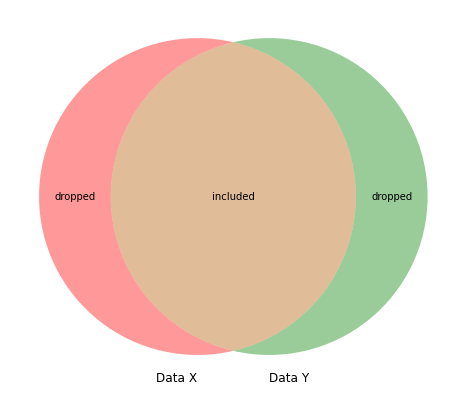

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.